In [40]:
import sys
import os
import glob

HOME_PATH = os.path.abspath("..")
sys.path.insert(0, HOME_PATH + "/qe")

import pandas as pd
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt

import atlas_plot as ap
plot = ap.Plotter()
import full_data as data

# # ONNX
# import tf2onnx
# import onnx
# import onnxruntime as ort

SEED = 42  # set random seed (global variable)
GEV = 1e-3

In [41]:
# truth
lep0_truth = data.Truth_lead_lep()
lep1_truth = data.Truth_sublead_lep()
met_truth = data.Truth_met()
w0 = data.Lead_w()
w1 = data.Sublead_w()
mc_weight = data.MC_weight().w

# reco
lep0 = data.Lead_lep()
lep1 = data.Sublead_lep()
met = data.Met()

In [42]:
# define preselection cuts

cut_pre_pt_lead = lep0.pt > 22
print(len(lep0.energy) - np.sum(cut_pre_pt_lead * 1))
cut_pre_pt_sub = lep1.pt > 15
print(len(lep0.energy) - np.sum(cut_pre_pt_sub * 1))
cut_pre_dilep_m = (
    np.sqrt(
        np.square(lep0.energy + lep1.energy)
        - np.square(lep0.px + lep1.px)
        - np.square(lep0.py + lep1.py)
        - np.square(lep0.pz + lep1.pz)
    )
    > 10
)
print(len(lep0.energy) - np.sum(cut_pre_dilep_m * 1))
cut_pre_pt_miss = met.pt > 20
print(len(lep0.energy) - np.sum(cut_pre_pt_miss * 1))
PRE_CUT = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
print(len(lep0.energy) - np.sum(PRE_CUT * 1))
del (cut_pre_pt_lead, cut_pre_pt_sub, cut_pre_dilep_m, cut_pre_pt_miss)


0
8248
12311
25372
44262


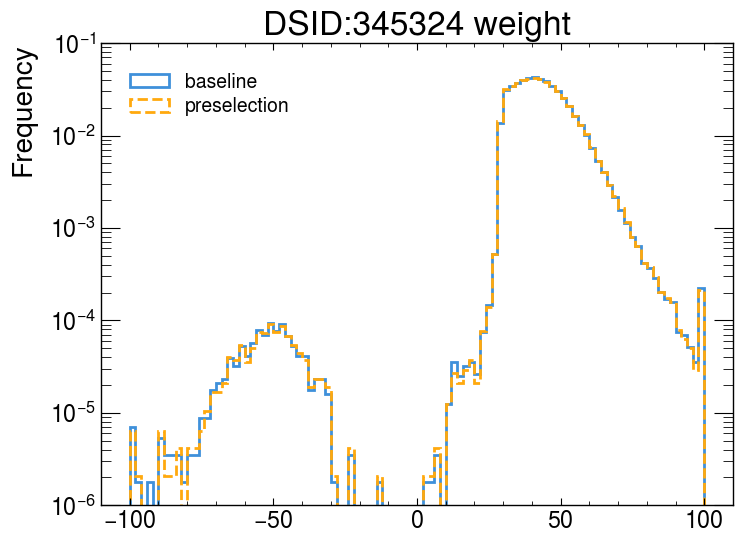

584
count    283172.000000
mean         43.400356
std          10.496175
min        -100.000000
25%          36.359527
50%          42.365246
75%          49.187515
max         100.000000
dtype: float64

count    238910.000000
mean         43.407896
std          10.510786
min        -100.000000
25%          36.317402
50%          42.381498
75%          49.232085
max         100.000000
dtype: float64
486


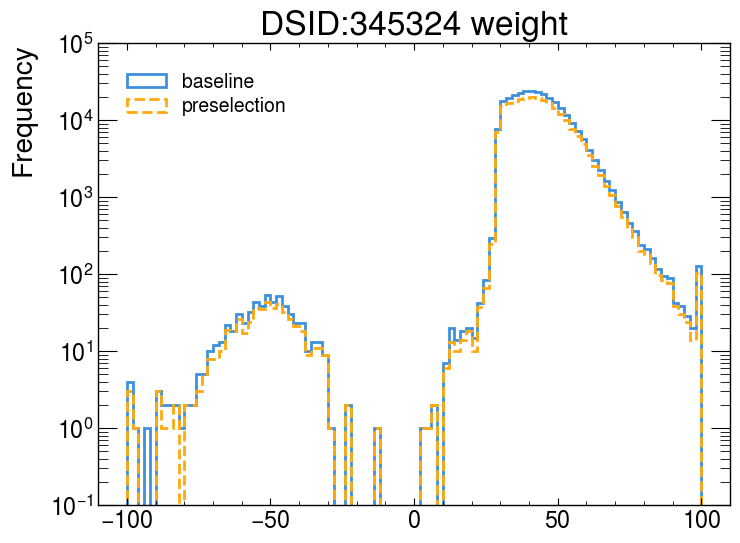

In [59]:
mc_weight.plot.hist(bins=100, histtype='step', linewidth=2., density=True, title="DSID:345324 weight")
mc_weight[PRE_CUT].plot.hist(bins=100, histtype='step', linewidth=2., linestyle="--", density=True, )
plt.legend(["baseline", "preselection"])
plt.semilogy()
plt.xlim(-110, 110)
plt.show()
mc_weight.plot.hist(bins=100, histtype='step', linewidth=2., density=False, title="DSID:345324 weight")
mc_weight[PRE_CUT].plot.hist(bins=100, histtype='step', linewidth=2., linestyle="--", density=False, )
plt.legend(["baseline", "preselection"])
plt.semilogy()
plt.xlim(-110, 110)
print(np.sum(mc_weight <= 0))
print(mc_weight.describe(), end="\n\n")
print(mc_weight[PRE_CUT].describe())
print(np.sum(mc_weight[PRE_CUT] <= 0))

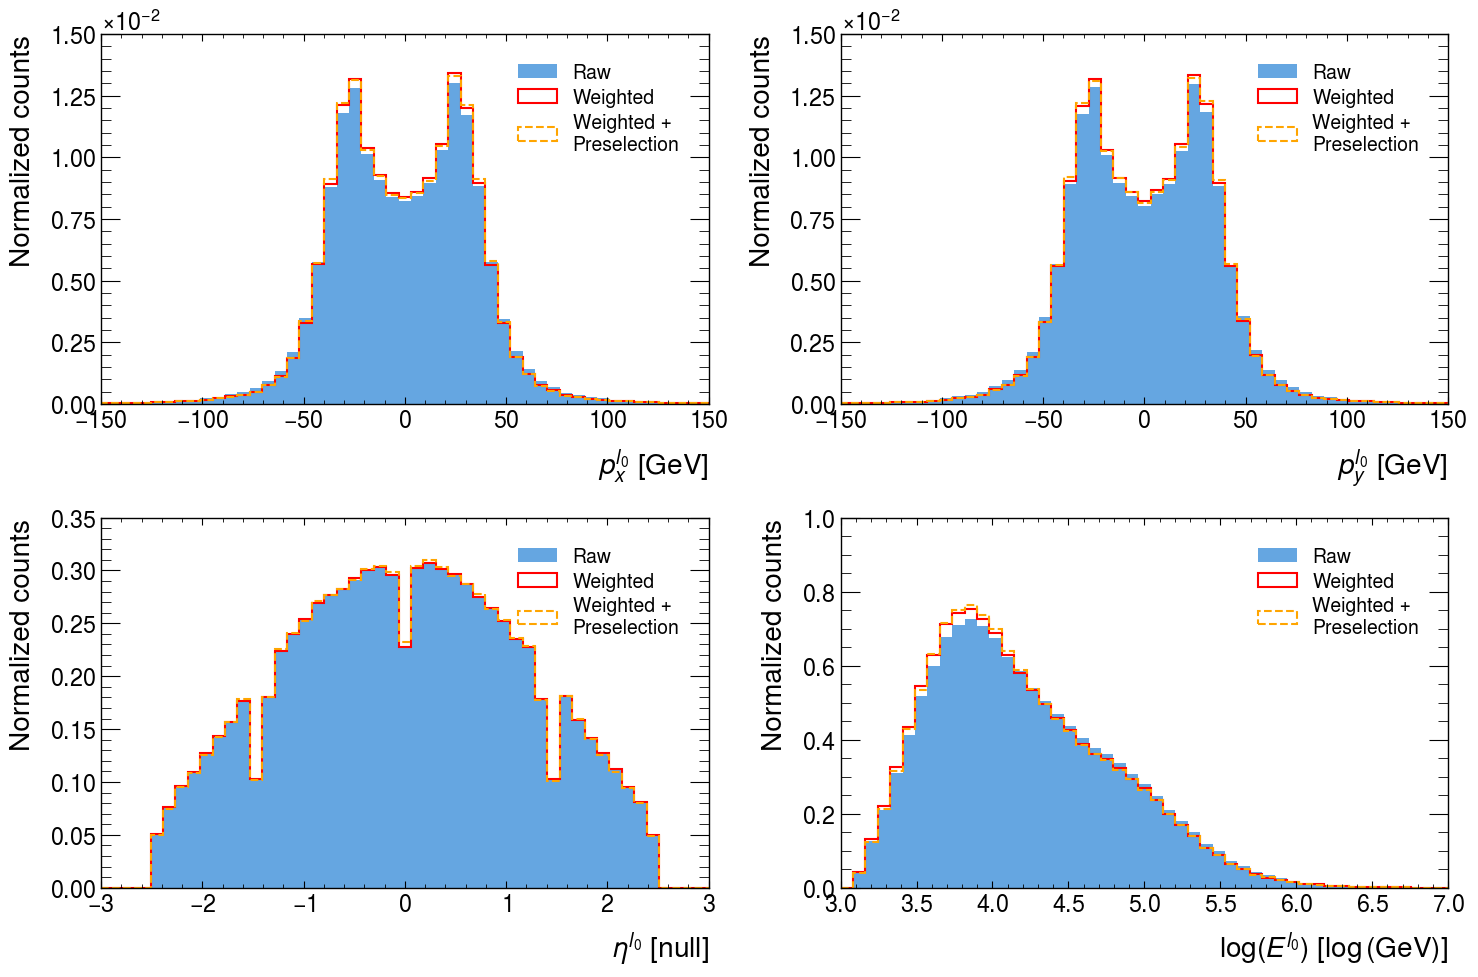

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
lep0.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
lep0.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
lep0.px[PRE_CUT].plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{l_0}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
lep0.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
lep0.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
lep0.py[PRE_CUT].plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{l_0}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# eta
bins_edges = np.linspace(-3, 3, 50)
lep0.eta.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
lep0.eta.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
lep0.eta[PRE_CUT].plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 0].set_xlim(-3, 3)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$\eta^{l_0}$ [null]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(3, 7, 50)
np.log(lep0.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
np.log(lep0.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
np.log(lep0.energy)[PRE_CUT].plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 1].set_xlim(3, 7)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$\log(E^{l_0})$ [$\log$(GeV)]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

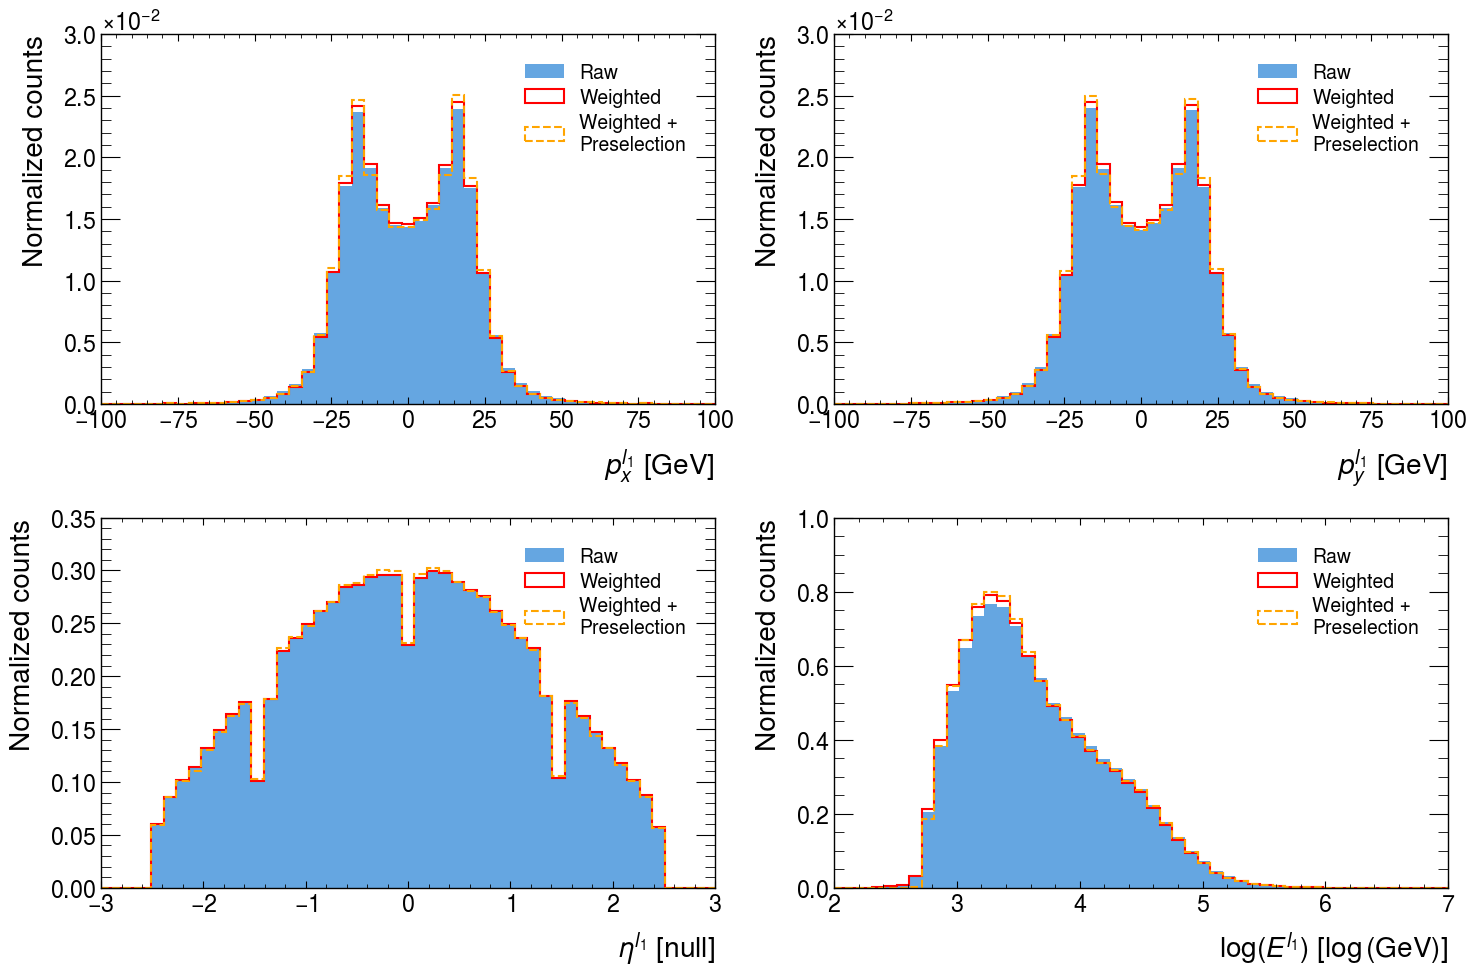

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-100, 100, 50)
lep1.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
lep1.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
lep1.px[PRE_CUT].plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 0].set_xlim(-100, 100)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{l_1}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
lep1.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
lep1.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
lep1.py[PRE_CUT].plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 1].set_xlim(-100, 100)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{l_1}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# eta
bins_edges = np.linspace(-3, 3, 50)
lep1.eta.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
lep1.eta.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
lep1.eta[PRE_CUT].plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 0].set_xlim(-3, 3)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$\eta^{l_1}$ [null]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(2, 7, 50)
np.log(lep1.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
np.log(lep1.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
np.log(lep1.energy)[PRE_CUT].plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 1].set_xlim(2, 7)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$\log(E^{l_1})$ [$\log$(GeV)]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

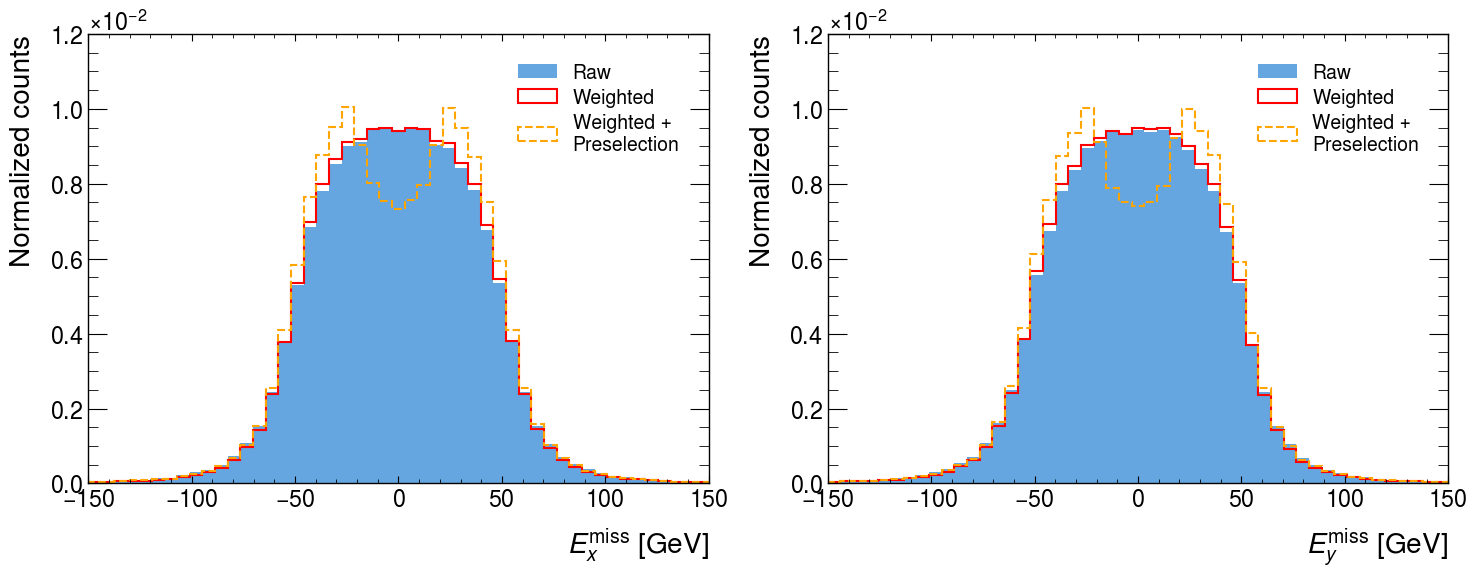

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# px
bins_edges = np.linspace(-150, 150, 50)
met.px.plot.hist(ax=axs[0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
met.px.plot.hist(ax=axs[0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
met.px[PRE_CUT].plot.hist(ax=axs[0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0].set_xlim(-150, 150)
axs[0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0].set_xlabel(r"$E_{x}^{\text{miss}}$ [GeV]")
axs[0].set_ylabel("Normalized counts")

# py
met.py.plot.hist(ax=axs[1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
met.py.plot.hist(ax=axs[1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
met.py[PRE_CUT].plot.hist(ax=axs[1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1].set_xlim(-150, 150)
axs[1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1].set_xlabel(r"$E_{y}^{\text{miss}}$ [GeV]")
axs[1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

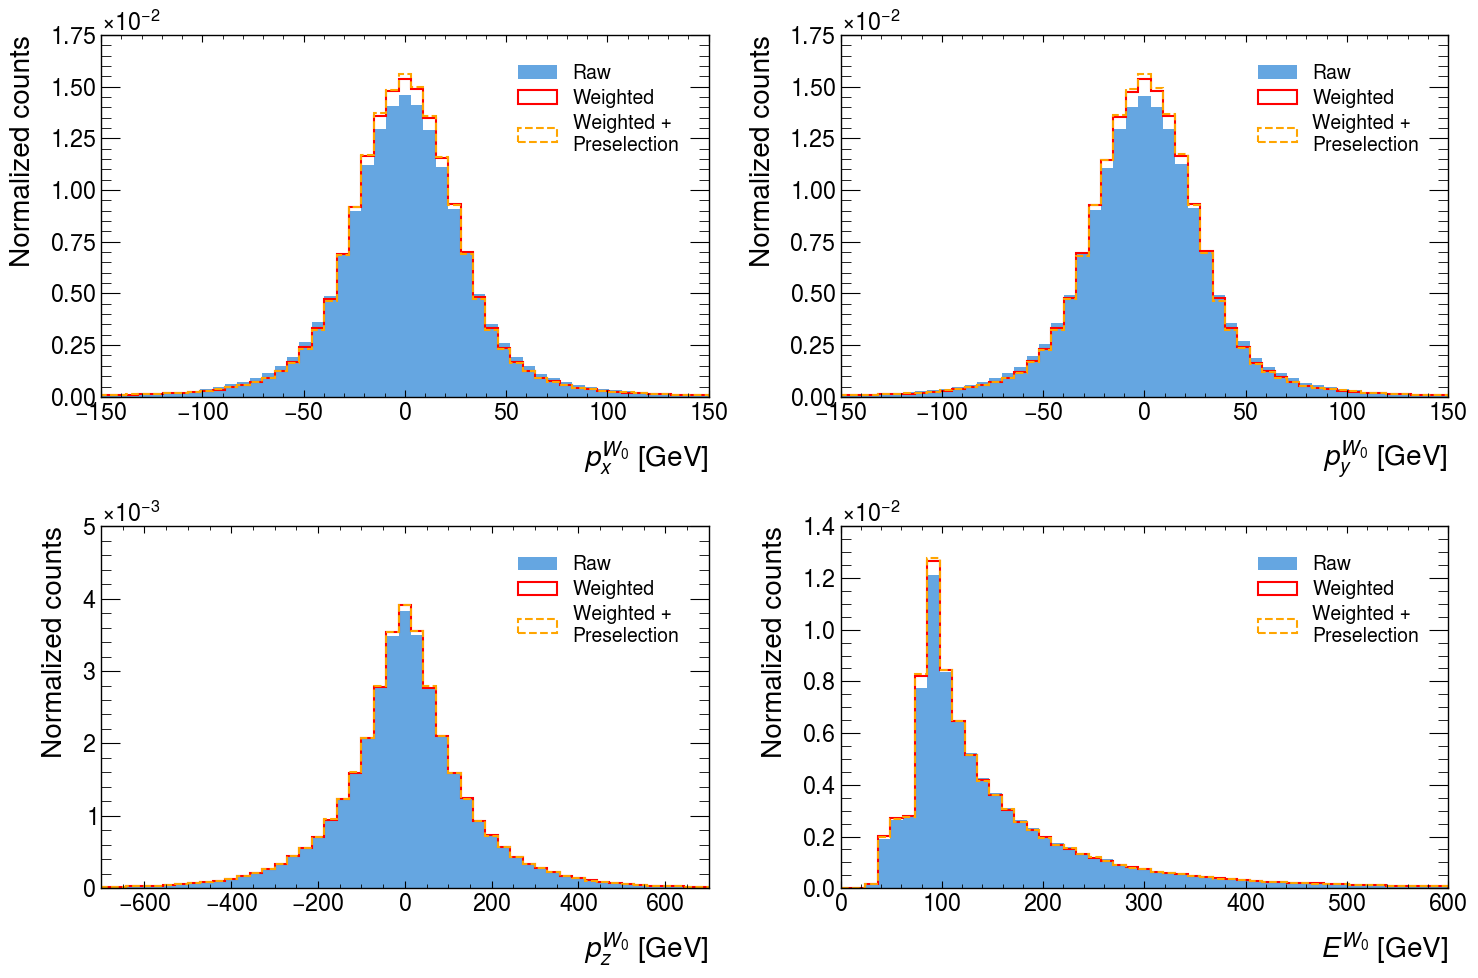

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
w0.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w0.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w0.px[PRE_CUT].plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{W_0}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
w0.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w0.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w0.py[PRE_CUT].plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{W_0}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# pz
bins_edges = np.linspace(-700, 700, 50)
w0.pz.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
w0.pz.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
w0.pz[PRE_CUT].plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 0].set_xlim(-700, 700)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$p_{z}^{W_0}$ [GeV]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(0, 600, 50)
(w0.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
(w0.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
(w0.energy)[PRE_CUT].plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 1].set_xlim(0, 600)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$E^{W_0}$ [GeV]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

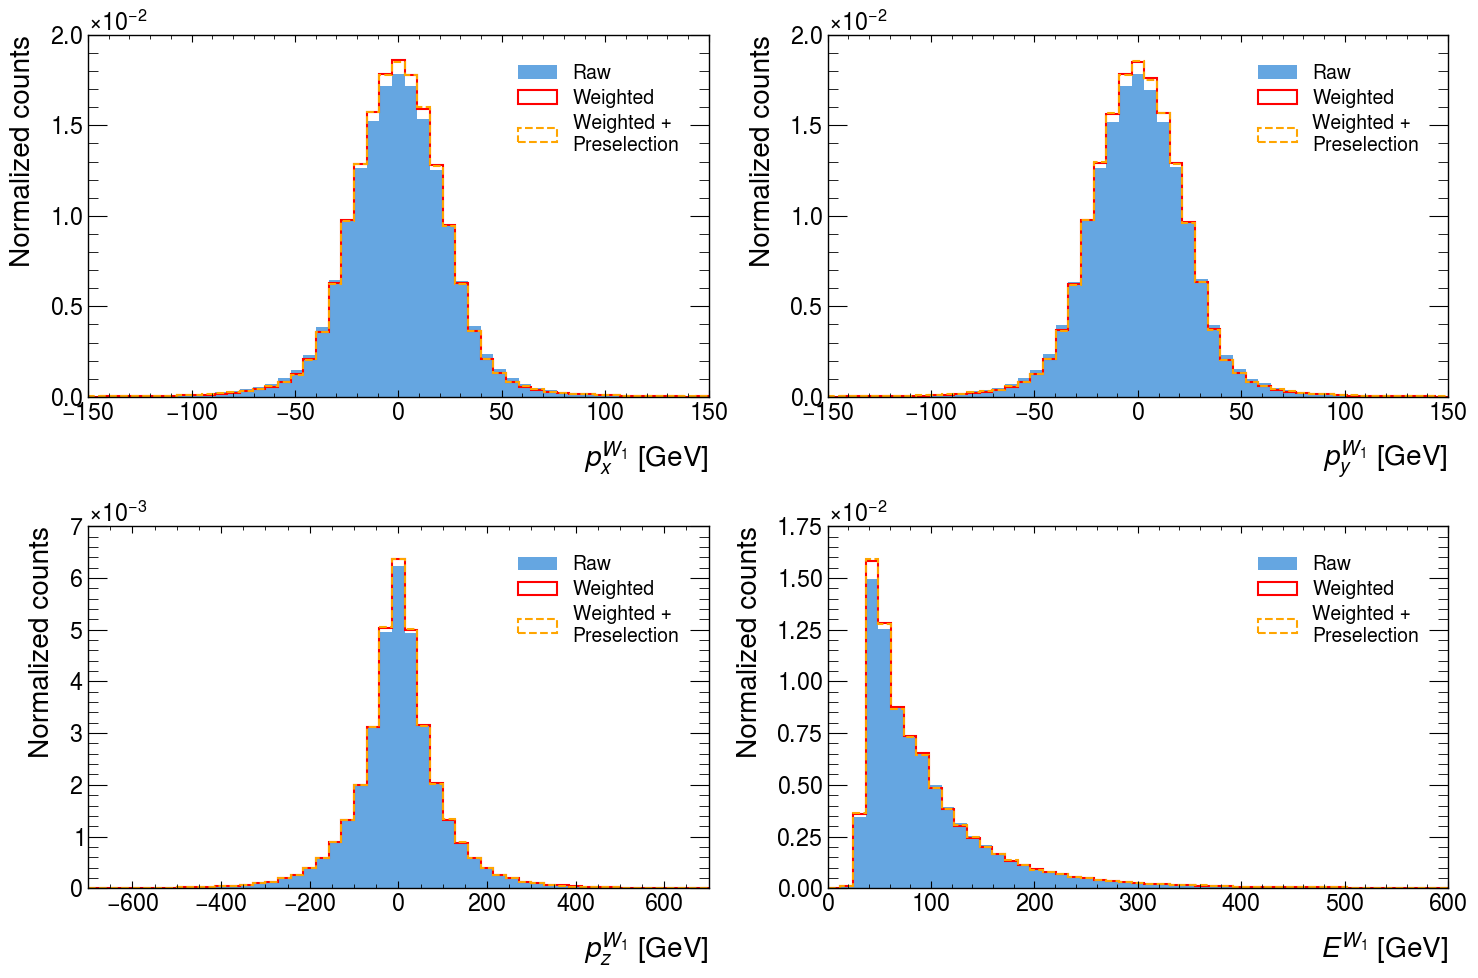

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
w1.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w1.px.plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w1.px[PRE_CUT].plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{W_1}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
w1.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w1.py.plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w1.py[PRE_CUT].plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{W_1}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# pz
bins_edges = np.linspace(-700, 700, 50)
w1.pz.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
w1.pz.plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
w1.pz[PRE_CUT].plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 0].set_xlim(-700, 700)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$p_{z}^{W_1}$ [GeV]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(0, 600, 50)
(w1.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='bar', alpha=.8, density=True, linewidth=1.5)
(w1.energy).plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', density=True, weights=mc_weight, color="red", linewidth=1.5)
(w1.energy)[PRE_CUT].plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1, 1].set_xlim(0, 600)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$E^{W_1}$ [GeV]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

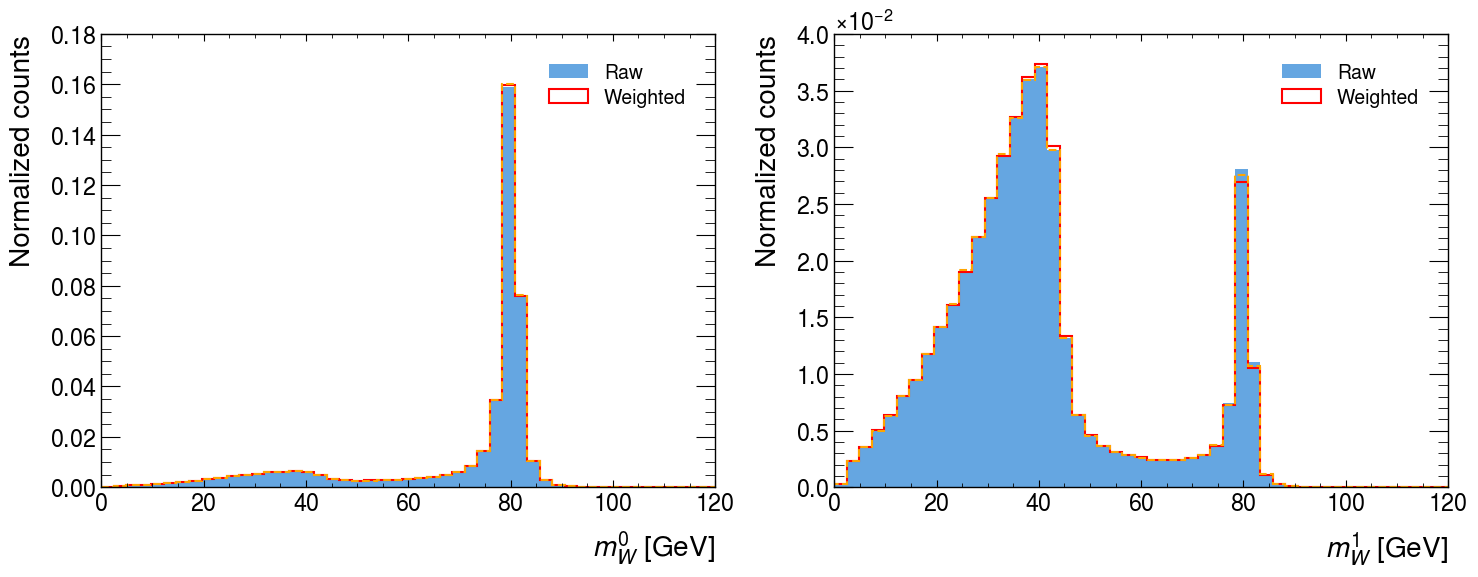

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# px
bins_edges = np.linspace(0, 120, 50)
w0.m.plot.hist(ax=axs[0], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w0.m.plot.hist(ax=axs[0], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w0.m[PRE_CUT].plot.hist(ax=axs[0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[0].set_xlim(0, 120)
axs[0].legend(["Raw", "Weighted"])
axs[0].set_xlabel(r"$m_{W}^{0}$ [GeV]")
axs[0].set_ylabel("Normalized counts")

# py
w1.m.plot.hist(ax=axs[1], bins=bins_edges, histtype='bar', linewidth=1.5, alpha=.8, density=True)
w1.m.plot.hist(ax=axs[1], bins=bins_edges, histtype='step', weights=mc_weight, color="red", linewidth=1.5, density=True)
w1.m[PRE_CUT].plot.hist(ax=axs[1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], color="orange", linestyle="--", linewidth=1.5, density=True)
axs[1].set_xlim(0, 120)
axs[1].legend(["Raw", "Weighted"])
axs[1].set_xlabel(r"$m_{W}^{1}$ [GeV]")
axs[1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()